# Titanic Survival Classification Challenge

This challenge aims to predict whether a Titanic passenger survived the disaster, based on available information such as passenger class, sex, and age.  
We will use labeled training data to build a classification model, and then apply it to unlabeled test data to predict survival outcomes (1 = survived, 0 = did not survive).

## Load and explore the data

In this section we load the trainig data, visualize the structure, and explore some of their features to understand how the data is formed and to learn whether specific features will need later processing.

In [453]:
import pandas as pd

In [454]:
train = pd.read_csv("train.csv")

In [455]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [456]:
# Number of passengers that died/survived in our training dataset
print("In our dataset, 549 out of 891 died:", (549/891)*100)
train["Survived"].value_counts()

In our dataset, 549 out of 891 died: 61.61616161616161


Survived
0    549
1    342
Name: count, dtype: int64

In [457]:
# Number of passengers in each class
train["Pclass"].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [458]:
# Number of passengers per sex
train["Sex"].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [459]:
# Check number of missing values for later processing
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

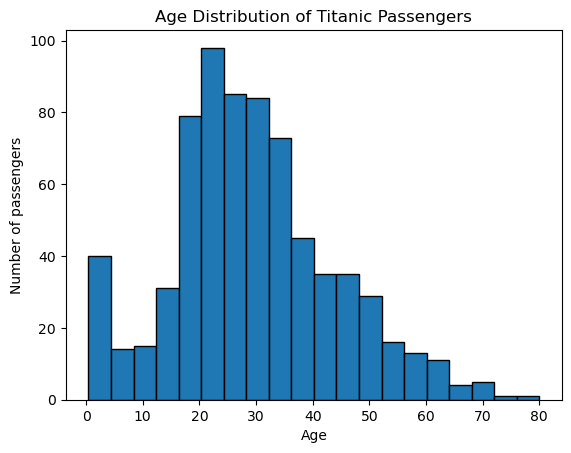

In [460]:
import matplotlib.pyplot as plt

# Show the distribution of ages in the training dataset
plt.hist(train["Age"], bins = 20, edgecolor='black')
plt.title("Age Distribution of Titanic Passengers")
plt.xlabel("Age")
plt.ylabel("Number of passengers")
plt.show()

## Feature Engineering

In this section, we perform feature engineering to prepare the data for modeling. This involves transforming existing variables, encoding categorical features, and creating new ones that may help the model capture more informative patterns.

### Extract relevant information from the names (prefixes such as Mr, Miss, Mrs or others)

In [461]:
# Create a new column with the prefix extracted from the name
train["Prefix"] = [row.split(",")[1].split(".")[0].strip() for row in train["Name"]]

In [462]:
# Visualize the existing prefixes in the training dataset
train["Prefix"].value_counts()

Prefix
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: count, dtype: int64

In [463]:
# We create a list of prefixes excluding the most common ones (Mr, Miss, Mrs)
special_prefixes = train["Prefix"].value_counts()[3:].index.tolist()
special_prefixes

['Master',
 'Dr',
 'Rev',
 'Mlle',
 'Major',
 'Col',
 'the Countess',
 'Capt',
 'Ms',
 'Sir',
 'Lady',
 'Mme',
 'Don',
 'Jonkheer']

In [464]:
# Create a new column to group prefixes into "Special" or keep them as one of the common ones
train["Prefix_Group"] = train["Prefix"].apply(lambda x: x if x not in special_prefixes else "Special")
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Prefix,Prefix_Group
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Rev,Special
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Miss,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,Miss,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Mr,Mr


This results on having useful information, that might be predicting for the survival status of each passenger (further than sex, it can help distinguish if a passenger had any kind of special treatment)

### Obtaining the fare per person

Many of the passengers, as seen below, have the same ticket code with the same price. This indicates that some people might have bough their ticket in groups, which means that the original Fare feature indicates the total price of the ticket, and not per person. Since the price paid per person can also be revealing on whether a person survives or not, it can also be interesting to compute the fare per person so that the model can learn patterns individually.

In [465]:
# Grouping by ticket
grouped_t = train.groupby("Ticket").agg(
    PassengerCount=("PassengerId", "count"),
    FareValues=("Fare", "first")
)

# Grouping by ticket and fare, to see if there are shared tickets with different fares
grouped_tf = train.groupby(["Ticket", "Fare"]).agg(
    PassengerCount=("PassengerId", "count"),
    FareValues=("Fare", "first")
)

abs(len(grouped_t) - len(grouped_tf))  # Check if there are shared tickets with different fares

1

Since most shared tickets have the same fare (all but 1), we can assume that this fare is representative of the whole group.  
Thus, we can proceed to estimate the fare/person, which allows us to use a more individualized feature.

In [466]:
# For each passenger, count the number of passengers with the same ticket
ticket_counts = train.groupby("Ticket")["PassengerId"].transform("count")

# Calculate the estimated fare per person
train["FarePerPerson"] = train["Fare"] / ticket_counts
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Prefix,Prefix_Group,FarePerPerson
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,Mr,7.2500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,Mrs,71.2833
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,Miss,7.9250
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,Mrs,26.5500
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,Mr,8.0500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Rev,Special,13.0000
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Miss,Miss,30.0000
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,Miss,Miss,11.7250
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Mr,Mr,30.0000


### Obtaining the family size of each passenger

Two variables related to the relative familiars aboard of each passenger are given: SibSp (number of siblings/spouses) and Parch (number of parents/children). For reducing dimiensionality and capture family structure more effectively, we can also sum the total amount of family members by adding the values of this two columns, creating the feature FamilySize. We also add +1 to consider passenger themselves.

In [467]:
train["FamilySize"] = train["SibSp"] + train["Parch"] + 1
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Prefix,Prefix_Group,FarePerPerson,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,Mr,7.2500,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,Mrs,71.2833,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,Miss,7.9250,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,Mrs,26.5500,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,Mr,8.0500,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Rev,Special,13.0000,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Miss,Miss,30.0000,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,Miss,Miss,11.7250,4
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Mr,Mr,30.0000,1


## Clean the data

Now that all features have been modified in the desired way, we need to make sure that the resulting dataset is well structured and ready for model training. This includes:  
- Removing columns with high number of nulls or non relevant information (Cabin, Ticket and PassengerId, respectively)
- Removing columns that have been re-engineeried (Name, Prefix, Fare, SibSp, Parch)
- One-Hot encoding categorical columns (to ensure the model can learn from numeric values)
- Fill columns with a relatively low number of missing values with their mean (Age)

In [468]:
# Drop features that conatin text and are not useful for prediction
data_clean = train.drop(columns=["Cabin", "Ticket", "PassengerId", "Name", "Prefix", "Fare", "SibSp", "Parch"])

# Convert sex, embarked and the prefix groups to numerical dummie values
data_clean = pd.get_dummies(data_clean, columns = ["Sex"], dtype="int", drop_first=True) # For sex, since it is binary, we can drop one of the columns to avoid multicollinearity
data_clean = pd.get_dummies(data_clean, columns = ["Embarked", "Prefix_Group"], dtype="int")

In [469]:
data_clean

,Survived,Pclass,Age,FarePerPerson,FamilySize,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Prefix_Group_Miss,Prefix_Group_Mr,Prefix_Group_Mrs,Prefix_Group_Special
0,0,3,22.0,7.2500,2,1,0,0,1,0,1,0,0
1,1,1,38.0,71.2833,2,0,1,0,0,0,0,1,0
2,1,3,26.0,7.9250,1,0,0,0,1,1,0,0,0
3,1,1,35.0,26.5500,2,0,0,0,1,0,0,1,0
4,0,3,35.0,8.0500,1,1,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,13.0000,1,1,0,0,1,0,0,0,1
887,1,1,19.0,30.0000,1,0,0,0,1,1,0,0,0
888,0,3,NaN,11.7250,4,0,0,0,1,1,0,0,0
889,1,1,26.0,30.0000,1,1,1,0,0,0,1,0,0


In [470]:
# Evaluate the number of missing values in the cleaned dataset
data_clean.isna().sum()

Survived                  0
Pclass                    0
Age                     177
FarePerPerson             0
FamilySize                0
Sex_male                  0
Embarked_C                0
Embarked_Q                0
Embarked_S                0
Prefix_Group_Miss         0
Prefix_Group_Mr           0
Prefix_Group_Mrs          0
Prefix_Group_Special      0
dtype: int64

In [471]:
# Since only age has missing values, we can fill it with the mean age of the passengers
data_clean = data_clean.fillna(value = data_clean["Age"].mean())
data_clean

,Survived,Pclass,Age,FarePerPerson,FamilySize,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Prefix_Group_Miss,Prefix_Group_Mr,Prefix_Group_Mrs,Prefix_Group_Special
0,0,3,22.000000,7.2500,2,1,0,0,1,0,1,0,0
1,1,1,38.000000,71.2833,2,0,1,0,0,0,0,1,0
2,1,3,26.000000,7.9250,1,0,0,0,1,1,0,0,0
3,1,1,35.000000,26.5500,2,0,0,0,1,0,0,1,0
4,0,3,35.000000,8.0500,1,1,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.000000,13.0000,1,1,0,0,1,0,0,0,1
887,1,1,19.000000,30.0000,1,0,0,0,1,1,0,0,0
888,0,3,29.699118,11.7250,4,0,0,0,1,1,0,0,0
889,1,1,26.000000,30.0000,1,1,1,0,0,0,1,0,0


## Fit Decision Tree / Random Forest Classifier

In this section, we fit several tree-based classifiers to the training data.  
Among the models tested, both DecisionTreeClassifier and RandomForestClassifier were evaluated. The Random Forest model was selected due to its superior generalization ability and better performance during training, compared to the single decision tree.

In [472]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# Prepare the data
data = data_clean.drop(columns= ["Survived"])
target = data_clean["Survived"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)

In [473]:
# Check overall class balance
print("Overall dataset balance:")
print(target.value_counts(normalize=True) * 100)

# Check training set class balance
print("\nTraining set balance:")
print(y_train.value_counts(normalize=True) * 100)

# Check test set class balance
print("\nTest set balance:")
print(y_test.value_counts(normalize=True) * 100)

Overall dataset balance:
Survived
0    61.616162
1    38.383838
Name: proportion, dtype: float64

Training set balance:
Survived
0    62.359551
1    37.640449
Name: proportion, dtype: float64

Test set balance:
Survived
0    58.659218
1    41.340782
Name: proportion, dtype: float64


In [474]:
# Fit random tree classifier to data and predict
clf = RandomForestClassifier(random_state = 2)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

In [475]:
# Visualize the accuracy and classification report to see the model performance
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.8156424581005587
              precision    recall  f1-score   support

           0       0.85      0.83      0.84       105
           1       0.77      0.80      0.78        74

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



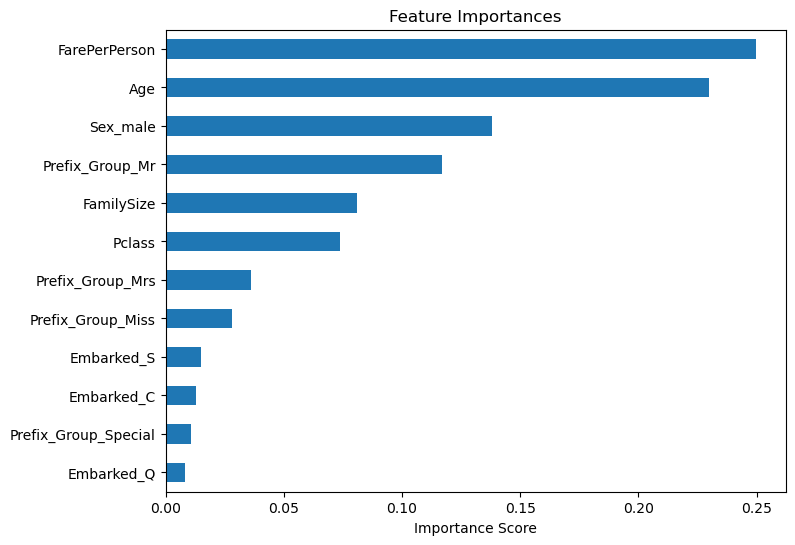

In [476]:
# To understand which features are most important for the model, we can visualize the feature importances
importances = clf.feature_importances_
features = X_train.columns

feat_importance = pd.Series(importances, index=features)
feat_importance.sort_values().plot(kind='barh', figsize=(8,6))
plt.title("Feature Importances")
plt.xlabel("Importance Score")
plt.show()

Random Tree Classifier resulted in a training accuracy of 0.82, meaning that 82% of the evaluated passengers were properly classified as survived/not survived.  
To understand which features had a bigger impact on the model decisions, we visualize the feature importances.  
FarePerPerson is the main feature used by the model, meaning that it was found to be the most predicting for survival. This is likely due to the fact that a higher fare indicates a higher economic status, and thus more priority when evacuating.  
Second most predictive feature was "Age", which likely had an impact on the preference of being evacuated (youngs first).  
The third is the engineered "Prefix_Group_Mr", which indicates that the passenger is a man, which were known to have less preference during the evacuation than woman.  
Interestingly, FamilySize appeared as the fourth most important feature. This may suggest that being part of a family group could impact survival either positively (more likely to be helped) or negatively (less flexible in emergencies).
Features related to sex (Sex_female, Sex_male) also ranked among the top contributors, aligning with feature "Prefix_Group_Mr" and historical accounts of evacuation protocols.

## Fit XGBoost Classifier

In the following code, a more complex and robust classifier is trained: XGBoost (Extreme Gradient Boosting). Going one step further than Random Forests, which builds trees sequentially, this model builds them sequentially, each new tree focusing on correcting errors made in previous trees. This allows the model to assign more weight to influential features and learn complex patterns more effectively.  
XGBoost obtained a slightly better traing accuracy than the Random Forests (0.83 vs 0.82) which is why it is selected as the final model for generating predictions.

It is also important to note that XGBoost performs best when its hyperparameters are properly tuned. For this reason, GridSearchCV was used, which allows to automatically train the model with the different sets of hyperparameters specified and choose the combination that resulted in the best corss-validated performance.

In [477]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# Initialize the XGBClassifier
xgb = XGBClassifier(
    use_label_encoder=False,   # avoid warning
    eval_metric='logloss',     # common eval metric for classification
    random_state=42
)

# Define parameter grid to search
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1]
}

# Setup GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    verbose=2,
    n_jobs=-1
)

# Fit on training data
grid_search.fit(X_train, y_train)

# Best params and best score
print("Best parameters:", grid_search.best_params_)
print("Best accuracy:", grid_search.best_score_)

# Use best estimator to predict
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters: {'colsample_bytree': 1, 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.8}
Best accuracy: 0.8272333300502315


In [478]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86       105
           1       0.82      0.74      0.78        74

    accuracy                           0.83       179
   macro avg       0.83      0.81      0.82       179
weighted avg       0.83      0.83      0.83       179



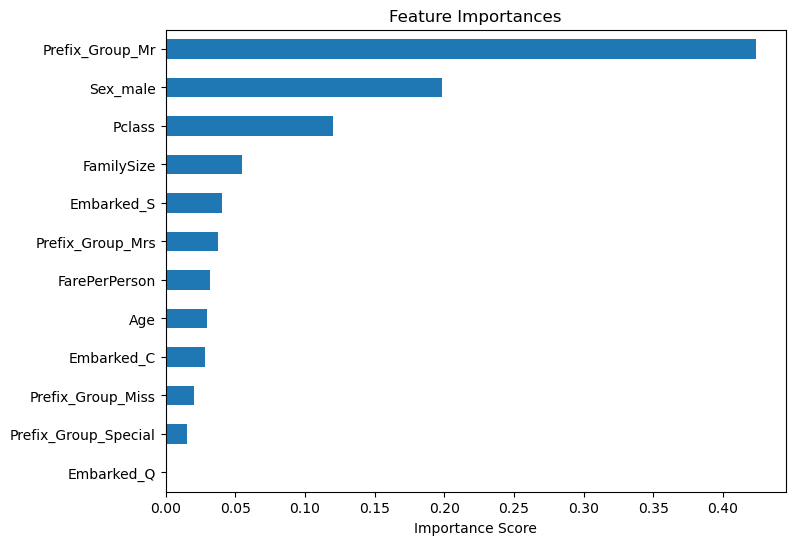

In [479]:
# To understand which features are most important for the model, we can visualize the feature importances
importances = best_model.feature_importances_
features = X_train.columns

feat_importance = pd.Series(importances, index=features)
feat_importance.sort_values().plot(kind='barh', figsize=(8,6))

plt.title("Feature Importances")
plt.xlabel("Importance Score")
plt.show()

XGBoost resulted in a 83% training accuracy, which translates to 83% of the passengers in the training set being properly classified, making it the most accurate of the models tested.  
Again, we can look at the feature importances to understand how the model makes decisions. In this case, the most important feature, by a large margin, is "Prefix_Group_Mr", meaning that the prefix, and thus the sex, was found to be the most predictive feature for survival.  
This pattern is further reinforced by the second most important feature, which is Sex_male, again indicating the importance of sex when it comes to preference in evacuation.  
Third most important feature, with a value of 0.12, is Pclass, indicating the class of the ticket. Again, this is likely related to the socioeconomic status and thus to the preference for being evacuated.

## Pre-process the final test data

This  section loads the data that will be used for making predictions.  
Before, we must apply the same pre-processing steps that were applied to the train data, ensuring that the same features from which the model learned during training are present in the final dataset from which the model will make predictions.

In [480]:
test = pd.read_csv("test.csv")

### Extract relevant information from the names (prefixes such as Mr, Miss, Mrs or others)

In [481]:
test["Prefix"] = [row.split(",")[1].split(".")[0].strip() for row in test["Name"]]

In [482]:
test["Prefix"].value_counts()

Prefix
Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: count, dtype: int64

In [483]:
special_prefixes = test["Prefix"].value_counts()[3:].index.tolist()
special_prefixes

['Master', 'Col', 'Rev', 'Ms', 'Dr', 'Dona']

In [484]:
test["Prefix_Group"] = test["Prefix"].apply(lambda x: x if x not in special_prefixes else "Special")
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Prefix,Prefix_Group
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Mr,Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Mrs,Mrs
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Mr,Mr
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Mr,Mr
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Mrs,Mrs
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,Mr,Mr
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,Dona,Special
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Mr,Mr
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,Mr,Mr


### Obtaining the fare per person

In [485]:
# For each passenger, count the number of passengers with the same ticket
ticket_counts = test.groupby("Ticket")["PassengerId"].transform("count")

# Calculate the estiimated fare per person
test["FarePerPerson"] = test["Fare"] / ticket_counts
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Prefix,Prefix_Group,FarePerPerson
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Mr,Mr,7.8292
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Mrs,Mrs,7.0000
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Mr,Mr,9.6875
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Mr,Mr,8.6625
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Mrs,Mrs,12.2875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,Mr,Mr,8.0500
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,Dona,Special,108.9000
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Mr,Mr,7.2500
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,Mr,Mr,8.0500


### Obtaining the family size of each passenger

In [486]:
test["FamilySize"] = test["SibSp"] + test["Parch"] + 1
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Prefix,Prefix_Group,FarePerPerson,FamilySize
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Mr,Mr,7.8292,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Mrs,Mrs,7.0000,2
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Mr,Mr,9.6875,1
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Mr,Mr,8.6625,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Mrs,Mrs,12.2875,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,Mr,Mr,8.0500,1
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,Dona,Special,108.9000,1
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Mr,Mr,7.2500,1
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,Mr,Mr,8.0500,1


## Clean the data

In [487]:
# Drop features that conatin text and are not useful for prediction
test_clean = test.drop(columns=["Cabin", "Ticket", "PassengerId", "Name", "Prefix", "Fare", "SibSp", "Parch"])

# COnvert sex and embarked to numerical dummie values
test_clean = pd.get_dummies(test_clean, columns = ["Sex"], dtype="int", drop_first=True) # For sex, since it is binary, we can drop one of the columns to avoid multicollinearity
test_clean = pd.get_dummies(test_clean, columns = ["Embarked", "Prefix_Group"], dtype="int")

In [488]:
test_clean

,Pclass,Age,FarePerPerson,FamilySize,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Prefix_Group_Miss,Prefix_Group_Mr,Prefix_Group_Mrs,Prefix_Group_Special
0,3,34.5,7.8292,1,1,0,1,0,0,1,0,0
1,3,47.0,7.0000,2,0,0,0,1,0,0,1,0
2,2,62.0,9.6875,1,1,0,1,0,0,1,0,0
3,3,27.0,8.6625,1,1,0,0,1,0,1,0,0
4,3,22.0,12.2875,3,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
413,3,NaN,8.0500,1,1,0,0,1,0,1,0,0
414,1,39.0,108.9000,1,0,1,0,0,0,0,0,1
415,3,38.5,7.2500,1,1,0,0,1,0,1,0,0
416,3,NaN,8.0500,1,1,0,0,1,0,1,0,0


In [489]:
test_clean.isna().sum()

Pclass                   0
Age                     86
FarePerPerson            1
FamilySize               0
Sex_male                 0
Embarked_C               0
Embarked_Q               0
Embarked_S               0
Prefix_Group_Miss        0
Prefix_Group_Mr          0
Prefix_Group_Mrs         0
Prefix_Group_Special     0
dtype: int64

In [ ]:
# Since only age has missing values, we can fill it with the mean age of the passengers, provided from the training set to avoid data leakage
age_mean = data_clean["Age"].mean()     # from training set
fare_mean = data_clean["FarePerPerson"].mean()   # from training set

# Fill missing values in the test set
test_clean["Age"] = test_clean["Age"].fillna(age_mean)
test_clean["FarePerPerson"] = test_clean["FarePerPerson"].fillna(fare_mean)
test_clean

,Pclass,Age,FarePerPerson,FamilySize,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Prefix_Group_Miss,Prefix_Group_Mr,Prefix_Group_Mrs,Prefix_Group_Special
0,3,34.500000,7.8292,1,1,0,1,0,0,1,0,0
1,3,47.000000,7.0000,2,0,0,0,1,0,0,1,0
2,2,62.000000,9.6875,1,1,0,1,0,0,1,0,0
3,3,27.000000,8.6625,1,1,0,0,1,0,1,0,0
4,3,22.000000,12.2875,3,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
413,3,29.699118,8.0500,1,1,0,0,1,0,1,0,0
414,1,39.000000,108.9000,1,0,1,0,0,0,0,0,1
415,3,38.500000,7.2500,1,1,0,0,1,0,1,0,0
416,3,29.699118,8.0500,1,1,0,0,1,0,1,0,0


## Predict labels

Finally, once our model has been trained and our test data is in the desired model, we simply use the best model found (from XGBoost) to make predictions on the test data.  
To make our predictions ready for submission, we create a dataframe with the specified columns PassengerId, which identify the passengers in the test data, and Survived, which indicates if our model predicted survival (1) or death (0)

In [ ]:
# Using the best model obtained, we can now make predictions on the test set
test_pred = best_model.predict(test_clean)

In [493]:
test_pred

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
# Convert the predictions to a dataframe ready for submission
submission = pd.DataFrame({
    "PassengerId": test["PassengerId"],
    "Survived": test_pred
})

submission.to_csv("submission.csv", index=False)

Predictions obtained a final accuracy of 76% on the test data from Kaggle, which is comparable to the baseline approach that uses only passenger sex as a predictor.  

However, the results in this project were obtained through a full machine learning pipeline, including data cleaning, feature engineering, hyperparameter tuning and model evaluation. This gives the used model the ability to generalize to a broader set of features such as age, ticket class, and name-derived titles, offering greater flexibility and interpretability.  

Overall, the project not only demonstrates predictive performance, in this case of XGBoost, but also shows a robust approach to prepare tabular data and training explainable models, which is transferable to a large number of real-world machine learning scenarios.